In [3]:
# ===============================================================
# Cell 1 — Setup, Fonts, Loader, Plot Helpers
# ===============================================================
import os
import joblib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# ---------------------------------------------------------------
# 1) Register Times New Roman from local "fonts" folder
# ---------------------------------------------------------------
font_files = fm.findSystemFonts(fontpaths=['fonts'], fontext='ttf')
for f in font_files:
    fm.fontManager.addfont(f)

plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 10,
})

# ---------------------------------------------------------------
# 2) Directory containing the saved .joblib files
# ---------------------------------------------------------------
EXPORT_DIR = "."

# Expected filenames:
#   pitm_best_randomsearch_curves_PBROM_Cells_1.joblib
#   pitm_best_randomsearch_curves_PBROM_Cells_2.joblib
#   pitm_best_randomsearch_curves_NASA_Cells_1.joblib
#   pitm_best_randomsearch_curves_NASA_Cells_2.joblib
#   pitm_best_randomsearch_curves_D5_Cells_1.joblib

def load_group(label):
    """Load one group dictionary by its label (e.g., 'PBROM_Cells_1')."""
    filename = f"pitm_best_randomsearch_curves_{label}.joblib"
    path = os.path.join(EXPORT_DIR, filename)
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    return joblib.load(path)

# ---------------------------------------------------------------
# 3) Colors (journal-friendly)
# ---------------------------------------------------------------
COLOR_EXP  = "#1f77b4"  # blue
COLOR_PB   = "#ff7f0e"  # orange
COLOR_PITM = "#2ca02c"  # green

# ---------------------------------------------------------------
# 4) Plot helpers (match Cell 11 style)
# ---------------------------------------------------------------
def plot_group(ax, group_dict):
    """
    Plot all cells in one group on a given Axes.
    Expects group_dict["curves"] list with keys:
      't_dense_hours', 'Q_hat_pct', 'Q_pb_pct',
      't_exp_hours', 'Q_exp_pct'
    """
    curves = group_dict["curves"]

    for cell in curves:
        # Experimental: open circles
        ax.plot(
            cell["t_exp_hours"], cell["Q_exp_pct"],
            marker='o',
            markersize=3,
            linestyle='none',
            markerfacecolor='none',
            markeredgewidth=1.0,
            color=COLOR_EXP,
        )

        # PB-ROM: dashed
        ax.plot(
            cell["t_dense_hours"], cell["Q_pb_pct"],
            linestyle='--',
            linewidth=1.2,
            color=COLOR_PB,
        )

        # PITM: solid
        ax.plot(
            cell["t_dense_hours"], cell["Q_hat_pct"],
            linestyle='-',
            linewidth=1.5,
            color=COLOR_PITM,
        )

    ax.set_xlabel("Time (hours)")
    ax.set_ylabel("Capacity Degradation (%)")
    ax.grid(True, linestyle=':', alpha=0.55)


def add_panel_label(ax, label):
    """Add subplot label (e.g., 'a', 'b') at top-left."""
    ax.text(
        0.00, 1.15, label,
        transform=ax.transAxes,
        fontsize=11,
        # fontweight='bold',
        va='top',
        ha='left'
    )


def add_standard_legend(ax):
    """Add Exp / PB-ROM / PITM legend using the same styles as the curves."""
    # Dummy handles for legend
    ax.plot(
        [], [], marker='o', linestyle='none', markersize=4,
        markerfacecolor='none', markeredgewidth=1.0,
        color=COLOR_EXP, label='Exp.'
    )
    ax.plot(
        [], [], linestyle='--', linewidth=1.2,
        color=COLOR_PB, label='PB-ROM'
    )
    ax.plot(
        [], [], linestyle='-', linewidth=1.5,
        color=COLOR_PITM, label='PITM'
    )

    ax.legend(frameon=False, fontsize=9, loc='best')


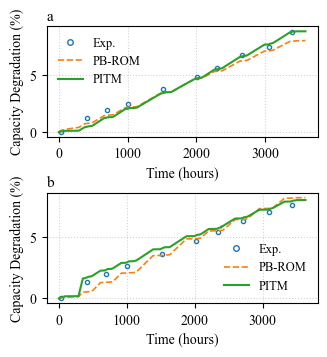

In [4]:
# ===============================================================
# Cell 2 — PBROM_Cells_1 and PBROM_Cells_2 (2×1 subplot)
# Figure size: 3.5 × 3.6 inches
# ===============================================================

pb1 = load_group("PBROM_Cells_1")
pb2 = load_group("PBROM_Cells_2")

fig, axes = plt.subplots(2, 1, figsize=(3.5, 3.6), sharex=False)
# fig, axes = plt.subplots(2, 1, figsize=(3.6, 3.6), sharex=False, constrained_layout=True)


# Top subplot
plot_group(axes[0], pb1)
add_panel_label(axes[0], "a")
add_standard_legend(axes[0])

# Bottom subplot
plot_group(axes[1], pb2)
add_panel_label(axes[1], "b")
add_standard_legend(axes[1])

# fig.subplots_adjust(hspace=0.00)
fig.subplots_adjust(hspace=0.5)   # try 0.10–0.15 range

# plt.tight_layout()
plt.show()

fig.savefig("PBROM_groups.jpg", dpi=600, format="jpg", bbox_inches="tight")


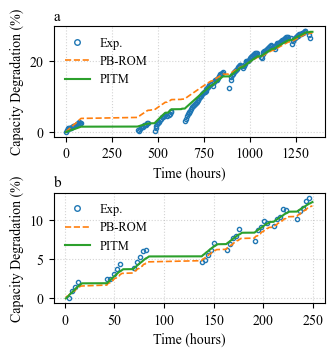

In [19]:
# ===============================================================
# Cell 3 — NASA_Cells_1 and NASA_Cells_2 (2×1 subplot)
# Figure size: 3.5 × 3.6 inches
# ===============================================================

n1 = load_group("NASA_Cells_1")
n2 = load_group("NASA_Cells_2")

fig, axes = plt.subplots(2, 1, figsize=(3.5, 3.6), sharex=False)
# fig, axes = plt.subplots(2, 1, figsize=(3.6, 3.6), sharex=False, constrained_layout=True)

# Top subplot
plot_group(axes[0], n1)
add_panel_label(axes[0], "a")
add_standard_legend(axes[0])

# Bottom subplot
plot_group(axes[1], n2)
add_panel_label(axes[1], "b")
add_standard_legend(axes[1])

# fig.subplots_adjust(hspace=10.0)
fig.subplots_adjust(hspace=0.5)   # try 0.10–0.15 range
# plt.tight_layout()
plt.show()

fig.savefig("NASA_groups.jpg", dpi=600, format="jpg", bbox_inches="tight")



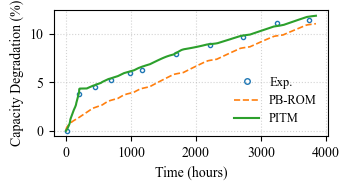

In [39]:
# ===============================================================
# Cell 4 — D5_Cells_1 (single panel)
# Figure size: 3.6 × 3.6 inches
# ===============================================================

d5 = load_group("D5_Cells_1")

fig, ax = plt.subplots(1, 1, figsize=(3.6, 2.0))

plot_group(ax, d5)
# add_panel_label(ax, "a")
add_standard_legend(ax)

plt.tight_layout()
plt.show()

fig.savefig("D5_group.jpg", dpi=600, format="jpg", bbox_inches="tight")


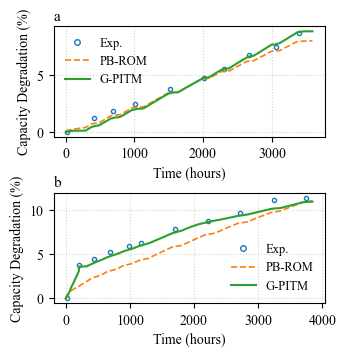

In [2]:
# ===============================================================
# Cell — Plot 2×1 figure for MULTI-GROUP test batteries
# (use this only for the script where training/testing uses multiple groups)
# ===============================================================

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import os

# ---------------------------------------------------------------
# 1) Load Times New Roman (same as Cell 1)
# ---------------------------------------------------------------
font_files = fm.findSystemFonts(fontpaths=['fonts'], fontext='ttf')
for f in font_files:
    fm.fontManager.addfont(f)
plt.rcParams.update({"font.family": "Times New Roman", "font.size": 10})

# ---------------------------------------------------------------
# 2) Choose the TWO saved multi-group NPZ files
#    (these should come from the NEW Cell 12 with aligned/exported curves)
# ---------------------------------------------------------------
FILE_1 = "G-PITM_cell_D1C28_BEST_MODEL_CURVES.npz"   # <-- EDIT if needed
FILE_2 = "G-PITM_cell_D5C78_BEST_MODEL_CURVES.npz"   # <-- EDIT if needed

data1 = np.load(FILE_1, allow_pickle=True)
data2 = np.load(FILE_2, allow_pickle=True)

# ---------------------------------------------------------------
# 3) Helper: Plot one battery (Cell 11 style, using NEW keys)
# ---------------------------------------------------------------
COLOR_EXP  = "#1f77b4"  # blue
COLOR_PB   = "#ff7f0e"  # orange
COLOR_PITM = "#2ca02c"  # green

def plot_one(ax, data):
    """
    Expects the NEW format from Cell 12:
      - data["t_exp"]      : experimental time in hours  (sparse)
      - data["q_exp_pct"]  : experimental degradation in %
      - data["t_dense"]    : dense time in hours
      - data["q_pb_pct"]   : PB-ROM degradation in %
      - data["q_hat_pct"]  : PITM degradation in %
    """
    t_exp_hours   = data["t_exp"]
    q_exp_pct     = data["q_exp_pct"]
    t_dense_hours = data["t_dense"]
    q_pb_pct      = data["q_pb_pct"]
    q_hat_pct     = data["q_hat_pct"]

    # Experimental (scatter)
    ax.plot(
        t_exp_hours, q_exp_pct,
        marker='o', markersize=3, linestyle='none',
        markerfacecolor='none', markeredgewidth=1.0,
        color=COLOR_EXP
    )

    # PB-ROM (dashed)
    ax.plot(
        t_dense_hours, q_pb_pct,
        linestyle='--', linewidth=1.2, color=COLOR_PB
    )

    # PITM (solid)
    ax.plot(
        t_dense_hours, q_hat_pct,
        linestyle='-', linewidth=1.5, color=COLOR_PITM
    )

    ax.set_ylabel("Capacity Degradation (%)")
    ax.grid(True, linestyle=':', alpha=0.55)


def add_panel_label(ax, label):
    ax.text(
        0.00, 1.15, label,
        transform=ax.transAxes,
        fontsize=11,
        # fontweight='bold',
        va='top', ha='left'
    )


def add_legend(ax):
    ax.plot([], [], marker='o', markersize=4, linestyle='none',
            markerfacecolor='none', markeredgewidth=1.0,
            color=COLOR_EXP, label="Exp.")
    ax.plot([], [], linestyle='--', linewidth=1.2,
            color=COLOR_PB, label="PB-ROM")
    ax.plot([], [], linestyle='-', linewidth=1.5,
            color=COLOR_PITM, label="G-PITM")
    ax.legend(frameon=False, fontsize=9, loc='best')


# ---------------------------------------------------------------
# 4) Create 2×1 figure (3.5 × 3.6 inches)
# ---------------------------------------------------------------
# fig, axes = plt.subplots(2, 1, figsize=(3.6, 3.6), sharex=False, constrained_layout=True)
fig, axes = plt.subplots(2, 1, figsize=(3.5, 3.6), sharex=False)

fig.subplots_adjust(hspace=0.5)   # try 0.10, 0.08, 0.12 depending on taste


# Top subplot
plot_one(axes[0], data1)
add_panel_label(axes[0], "a")
add_legend(axes[0])

# Bottom subplot
plot_one(axes[1], data2)
add_panel_label(axes[1], "b")
add_legend(axes[1])

axes[0].set_xlabel("Time (hours)")
axes[1].set_xlabel("Time (hours)")

# ---------------------------------------------------------------
# 5) Save as JPG (600 dpi)
# ---------------------------------------------------------------
fig.savefig("MULTIGROUP_2subplot.jpg", dpi=600, format="jpg", bbox_inches="tight")

plt.show()
